In [64]:
import pandas as pd
import numpy as np
import scipy.stats as sp
from mpl_toolkits.basemap import Basemap
from sklearn.datasets.species_distributions import construct_grids
from sklearn.datasets import fetch_species_distributions
import matplotlib.pyplot as plt



In [54]:
dt = pd.read_csv("globalterrorismd.csv", encoding ='latin1')
dt.head()

/Users/pedroazambuja/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (4,6,31,33,53,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [55]:
dt.region_txt.value_counts()

Middle East & North Africa     46511
South Asia                     41497
South America                  18762
Western Europe                 16307
Sub-Saharan Africa             15491
Southeast Asia                 11453
Central America & Caribbean    10340
Eastern Europe                  5031
North America                   3346
East Asia                        794
Central Asia                     554
Australasia & Oceania            264
Name: region_txt, dtype: int64

In [56]:
dt = dt.loc[:, ['iyear','imonth','iday','country','gname',
'country_txt',
'region_txt',
'region',
'provstate',
'city',
'latitude',
'longitude',
'success',
'attacktype1',
'attacktype1_txt','targtype1',
'targtype1_txt','targsubtype1',
'targsubtype1_txt',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'weaptype1',
 'weaptype1_txt',
 'weapsubtype1',
 'weapsubtype1_txt',
 'weaptype2',
 'weaptype2_txt',
 'weapsubtype2',
 'weapsubtype2_txt',
 'weaptype3',
 'weaptype3_txt',
 'weapsubtype3',
 'weapsubtype3_txt',
 'weapdetail',
 'nkill',
 'nwound',
 'property',
 'propextent',
 'propextent_txt',
 'propvalue',
 'ishostkid',
 'nhostkid',
 'nhostkidus',
 'kidhijcountry']]
dt = dt[(dt.nwound > 0) | (dt.nkill > 0)]

In [57]:
dt.head()

,iyear,imonth,iday,country,gname,country_txt,region_txt,region,provstate,city,...,nkill,nwound,property,propextent,propextent_txt,propvalue,ishostkid,nhostkid,nhostkidus,kidhijcountry
0,1970,7,2,58,MANO-D,Dominican Republic,Central America & Caribbean,2,NaN,Santo Domingo,...,1.0,0.0,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,1970,1,0,160,Unknown,Philippines,Southeast Asia,5,Tarlac,Unknown,...,1.0,0.0,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
16,1970,1,11,65,Eritrean Liberation Front,Ethiopia,Sub-Saharan Africa,11,Unknown,Unknown,...,1.0,0.0,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
20,1970,1,14,217,Black Nationalists,United States,North America,1,Illinois,Champaign,...,0.0,1.0,1,3.0,Minor (likely < $1 million),NaN,0.0,NaN,NaN,NaN
25,1970,1,20,83,Unknown,Guatemala,Central America & Caribbean,2,NaN,Guatemala City,...,1.0,0.0,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [58]:
country_list = []
for i in dt.country_txt:
    country_list.append(i)
country_series = pd.Series(country_list)

country_series.value_counts()


Iraq                              18522
Afghanistan                        9110
Pakistan                           8334
India                              6661
Colombia                           4149
Philippines                        3787
United Kingdom                     2978
Peru                               2630
Thailand                           2529
Turkey                             2416
Nigeria                            2373
Algeria                            2328
Sri Lanka                          2303
Somalia                            2300
El Salvador                        1970
Yemen                              1826
Egypt                              1415
West Bank and Gaza Strip           1380
Russia                             1371
Lebanon                            1355
Syria                              1352
Spain                              1192
Guatemala                          1168
South Africa                       1154
Libya                              1035


In [59]:

dt_location = dt.loc[: ,['country_txt','latitude','longitude','nkill','nwound']]
dt_location

,country_txt,latitude,longitude,nkill,nwound
0,Dominican Republic,18.456792,-69.951164,1.0,0.0
2,Philippines,15.478598,120.599741,1.0,0.0
16,Ethiopia,NaN,NaN,1.0,0.0
20,United States,40.116748,-88.239270,0.0,1.0
25,Guatemala,14.624422,-90.532880,1.0,0.0
30,United States,40.783060,-73.971249,0.0,2.0
39,Philippines,15.675051,120.331618,0.0,1.0
59,West Germany (FRG),48.139126,11.580186,1.0,NaN
61,United States,37.869885,-122.270539,0.0,7.0
62,West Germany (FRG),48.139126,11.580186,7.0,9.0


In [60]:


                                                                                                                                                                        
dt_mediterraneo = dt[(dt.region_txt =="Middle East & North Africa")|(dt.region_txt=="Eastern Europe")|(dt.region_txt=="Western Europe")]







/Users/pedroazambuja/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/pedroazambuja/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


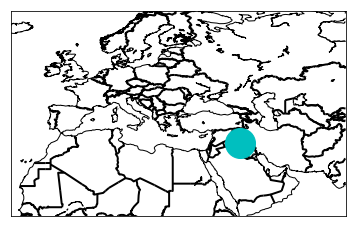

In [67]:
m = Basemap(projection="cyl",
           llcrnrlat=13.00,
           llcrnrlon=-19.66,
           urcrnrlat=69.71,
           urcrnrlon = 72.61,
           resolution='l')
#Coordenadas em latitude e longitude
coordenadas = {
    "IRAQUE" : [33.3,43.35],
    "Portugal": [38.4,9.8],
    "Espanha" : [41.23,2.9],
    "Franca" : [48.51,2.20],
    "Italia" : [43.76,11.25]
}
IRAQlat,IRAQlon = 33.3,43.55
xpt,ypt = m(IRAQlon,IRAQlat)
m.plot(xpt,ypt,'co',markersize=30)
m.drawcoastlines()
m.drawcountries(linewidth=2)
plt.show()